In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/imdb-dataset-of-top-1000-movies-and-tv-shows/imdb_top_1000.csv


In [2]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
df=pd.read_csv('/kaggle/input/imdb-dataset-of-top-1000-movies-and-tv-shows/imdb_top_1000.csv')
df

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,https://m.media-amazon.com/images/M/MV5BNGEwMT...,Breakfast at Tiffany's,1961,A,115 min,"Comedy, Drama, Romance",7.6,A young New York socialite becomes interested ...,76.0,Blake Edwards,Audrey Hepburn,George Peppard,Patricia Neal,Buddy Ebsen,166544,NaN
996,https://m.media-amazon.com/images/M/MV5BODk3Yj...,Giant,1956,G,201 min,"Drama, Western",7.6,Sprawling epic covering the life of a Texas ca...,84.0,George Stevens,Elizabeth Taylor,Rock Hudson,James Dean,Carroll Baker,34075,NaN
997,https://m.media-amazon.com/images/M/MV5BM2U3Yz...,From Here to Eternity,1953,Passed,118 min,"Drama, Romance, War",7.6,"In Hawaii in 1941, a private is cruelly punish...",85.0,Fred Zinnemann,Burt Lancaster,Montgomery Clift,Deborah Kerr,Donna Reed,43374,"30,500,000"
998,https://m.media-amazon.com/images/M/MV5BZTBmMj...,Lifeboat,1944,NaN,97 min,"Drama, War",7.6,Several survivors of a torpedoed merchant ship...,78.0,Alfred Hitchcock,Tallulah Bankhead,John Hodiak,Walter Slezak,William Bendix,26471,NaN


1)Display 10 row from dataset.

In [3]:
df.head(10)

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"
5,https://m.media-amazon.com/images/M/MV5BNzA5ZD...,The Lord of the Rings: The Return of the King,2003,U,201 min,"Action, Adventure, Drama",8.9,Gandalf and Aragorn lead the World of Men agai...,94.0,Peter Jackson,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,1642758,"377,845,905"
6,https://m.media-amazon.com/images/M/MV5BNGNhMD...,Pulp Fiction,1994,A,154 min,"Crime, Drama",8.9,"The lives of two mob hitmen, a boxer, a gangst...",94.0,Quentin Tarantino,John Travolta,Uma Thurman,Samuel L. Jackson,Bruce Willis,1826188,"107,928,762"
7,https://m.media-amazon.com/images/M/MV5BNDE4OT...,Schindler's List,1993,A,195 min,"Biography, Drama, History",8.9,"In German-occupied Poland during World War II,...",94.0,Steven Spielberg,Liam Neeson,Ralph Fiennes,Ben Kingsley,Caroline Goodall,1213505,"96,898,818"
8,https://m.media-amazon.com/images/M/MV5BMjAxMz...,Inception,2010,UA,148 min,"Action, Adventure, Sci-Fi",8.8,A thief who steals corporate secrets through t...,74.0,Christopher Nolan,Leonardo DiCaprio,Joseph Gordon-Levitt,Elliot Page,Ken Watanabe,2067042,"292,576,195"
9,https://m.media-amazon.com/images/M/MV5BMmEzNT...,Fight Club,1999,A,139 min,Drama,8.8,An insomniac office worker and a devil-may-car...,66.0,David Fincher,Brad Pitt,Edward Norton,Meat Loaf,Zach Grenier,1854740,"37,030,102"


2) Check last 10 rows in dataset

In [4]:
df.tail(10)

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
990,https://m.media-amazon.com/images/M/MV5BYjRmY2...,Giù la testa,1971,PG,157 min,"Drama, War, Western",7.6,A low-life bandit and an I.R.A. explosives exp...,77.0,Sergio Leone,Rod Steiger,James Coburn,Romolo Valli,Maria Monti,30144,"696,690"
991,https://m.media-amazon.com/images/M/MV5BMzAyND...,Kelly's Heroes,1970,GP,144 min,"Adventure, Comedy, War",7.6,A group of U.S. soldiers sneaks across enemy l...,50.0,Brian G. Hutton,Clint Eastwood,Telly Savalas,Don Rickles,Carroll O'Connor,45338,"1,378,435"
992,https://m.media-amazon.com/images/M/MV5BMjAwMT...,The Jungle Book,1967,U,78 min,"Animation, Adventure, Family",7.6,Bagheera the Panther and Baloo the Bear have a...,65.0,Wolfgang Reitherman,Phil Harris,Sebastian Cabot,Louis Prima,Bruce Reitherman,166409,"141,843,612"
993,https://m.media-amazon.com/images/M/MV5BYTE4YW...,Blowup,1966,A,111 min,"Drama, Mystery, Thriller",7.6,A fashion photographer unknowingly captures a ...,82.0,Michelangelo Antonioni,David Hemmings,Vanessa Redgrave,Sarah Miles,John Castle,56513,NaN
994,https://m.media-amazon.com/images/M/MV5BZjQyMG...,A Hard Day's Night,1964,U,87 min,"Comedy, Music, Musical",7.6,"Over two ""typical"" days in the life of The Bea...",96.0,Richard Lester,John Lennon,Paul McCartney,George Harrison,Ringo Starr,40351,"13,780,024"
995,https://m.media-amazon.com/images/M/MV5BNGEwMT...,Breakfast at Tiffany's,1961,A,115 min,"Comedy, Drama, Romance",7.6,A young New York socialite becomes interested ...,76.0,Blake Edwards,Audrey Hepburn,George Peppard,Patricia Neal,Buddy Ebsen,166544,NaN
996,https://m.media-amazon.com/images/M/MV5BODk3Yj...,Giant,1956,G,201 min,"Drama, Western",7.6,Sprawling epic covering the life of a Texas ca...,84.0,George Stevens,Elizabeth Taylor,Rock Hudson,James Dean,Carroll Baker,34075,NaN
997,https://m.media-amazon.com/images/M/MV5BM2U3Yz...,From Here to Eternity,1953,Passed,118 min,"Drama, Romance, War",7.6,"In Hawaii in 1941, a private is cruelly punish...",85.0,Fred Zinnemann,Burt Lancaster,Montgomery Clift,Deborah Kerr,Donna Reed,43374,"30,500,000"
998,https://m.media-amazon.com/images/M/MV5BZTBmMj...,Lifeboat,1944,NaN,97 min,"Drama, War",7.6,Several survivors of a torpedoed merchant ship...,78.0,Alfred Hitchcock,Tallulah Bankhead,John Hodiak,Walter Slezak,William Bendix,26471,NaN
999,https://m.media-amazon.com/images/M/MV5BMTY5OD...,The 39 Steps,1935,NaN,86 min,"Crime, Mystery, Thriller",7.6,A man in London tries to help a counter-espion...,93.0,Alfred Hitchcock,Robert Donat,Madeleine Carroll,Lucie Mannheim,Godfrey Tearle,51853,NaN


3) Find shape of our dataset (number of rows and number of columns)

In [5]:
print('Number of rows',df.shape[0])
print('Number of columns',df.shape[1])

Number of rows 1000
Number of columns 16


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Poster_Link    1000 non-null   object 
 1   Series_Title   1000 non-null   object 
 2   Released_Year  1000 non-null   object 
 3   Certificate    899 non-null    object 
 4   Runtime        1000 non-null   object 
 5   Genre          1000 non-null   object 
 6   IMDB_Rating    1000 non-null   float64
 7   Overview       1000 non-null   object 
 8   Meta_score     843 non-null    float64
 9   Director       1000 non-null   object 
 10  Star1          1000 non-null   object 
 11  Star2          1000 non-null   object 
 12  Star3          1000 non-null   object 
 13  Star4          1000 non-null   object 
 14  No_of_Votes    1000 non-null   int64  
 15  Gross          831 non-null    object 
dtypes: float64(2), int64(1), object(13)
memory usage: 125.1+ KB


5) Check missing values in the Dataset

In [7]:
print("Any missing values", df.isnull().values.any())

Any missing values True


In [8]:
df.isnull().sum()

Poster_Link        0
Series_Title       0
Released_Year      0
Certificate      101
Runtime            0
Genre              0
IMDB_Rating        0
Overview           0
Meta_score       157
Director           0
Star1              0
Star2              0
Star3              0
Star4              0
No_of_Votes        0
Gross            169
dtype: int64

6) Drop all the missing values 

In [9]:
df.dropna(axis=0)

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
990,https://m.media-amazon.com/images/M/MV5BYjRmY2...,Giù la testa,1971,PG,157 min,"Drama, War, Western",7.6,A low-life bandit and an I.R.A. explosives exp...,77.0,Sergio Leone,Rod Steiger,James Coburn,Romolo Valli,Maria Monti,30144,"696,690"
991,https://m.media-amazon.com/images/M/MV5BMzAyND...,Kelly's Heroes,1970,GP,144 min,"Adventure, Comedy, War",7.6,A group of U.S. soldiers sneaks across enemy l...,50.0,Brian G. Hutton,Clint Eastwood,Telly Savalas,Don Rickles,Carroll O'Connor,45338,"1,378,435"
992,https://m.media-amazon.com/images/M/MV5BMjAwMT...,The Jungle Book,1967,U,78 min,"Animation, Adventure, Family",7.6,Bagheera the Panther and Baloo the Bear have a...,65.0,Wolfgang Reitherman,Phil Harris,Sebastian Cabot,Louis Prima,Bruce Reitherman,166409,"141,843,612"
994,https://m.media-amazon.com/images/M/MV5BZjQyMG...,A Hard Day's Night,1964,U,87 min,"Comedy, Music, Musical",7.6,"Over two ""typical"" days in the life of The Bea...",96.0,Richard Lester,John Lennon,Paul McCartney,George Harrison,Ringo Starr,40351,"13,780,024"


7) Check for Duplicate Data 

In [10]:
dup_df=df.duplicated().any()
print("Are there any duplicate values?",dup_df)

Are there any duplicate values? False


8)Get Overall statistics about the dataframe 

In [11]:
df.describe()

,IMDB_Rating,Meta_score,No_of_Votes
count,1000.000000,843.000000,1.000000e+03
mean,7.949300,77.971530,2.736929e+05
std,0.275491,12.376099,3.273727e+05
min,7.600000,28.000000,2.508800e+04
25%,7.700000,70.000000,5.552625e+04
50%,7.900000,79.000000,1.385485e+05
75%,8.100000,87.000000,3.741612e+05
max,9.300000,100.000000,2.343110e+06


9 )Display title of the movie havinf runtime >=180 minutes

In [12]:
print(df.columns)


Index(['Poster_Link', 'Series_Title', 'Released_Year', 'Certificate',
       'Runtime', 'Genre', 'IMDB_Rating', 'Overview', 'Meta_score', 'Director',
       'Star1', 'Star2', 'Star3', 'Star4', 'No_of_Votes', 'Gross'],
      dtype='object')


10 )In which year there was the hightest average voting?.

In [13]:
group_data=df.groupby('Released_Year')['No_of_Votes'].mean().sort_values(ascending=False).reset_index().head(10)
group_data

,Released_Year,No_of_Votes
0,1994,666532.153846
1,1977,556087.333333
2,1999,536961.058824
3,2008,444044.904762
4,2010,431661.173913
5,2014,412249.312500
6,2012,400499.708333
7,1995,385083.631579
8,1980,384606.000000
9,1983,384088.800000


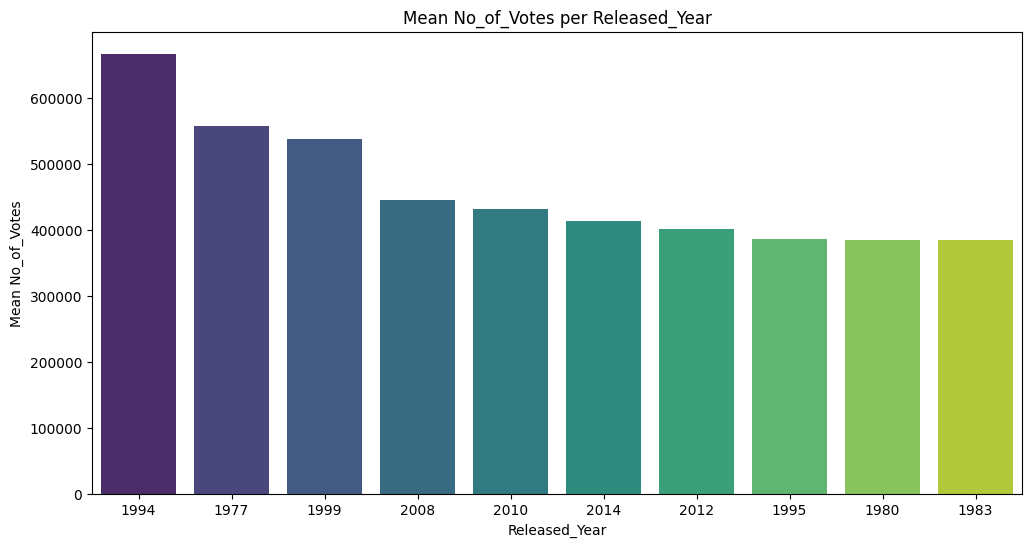

In [14]:
#  grouped_data = df.groupby('Released_Year')['No_of_Votes'].mean().sort_values(ascending=False).reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(x='Released_Year', y='No_of_Votes', data=group_data, palette='viridis')
plt.title('Mean No_of_Votes per Released_Year')
plt.xlabel('Released_Year')
plt.ylabel('Mean No_of_Votes')
plt.show()

To this analysis, movies released in 1994 received the highest average number of votes among the years considered in the dataset.

11) In which year there was the highest Average meta score.

In [15]:
group_data=df.groupby('Released_Year')['Meta_score'].mean().sort_values(ascending=False).reset_index().head(10)
group_data.head(10)

,Released_Year,Meta_score
0,1941,98.000000
1,1927,98.000000
2,1950,98.000000
3,1949,97.000000
4,1925,97.000000
5,1936,96.000000
6,1938,95.333333
7,1931,95.000000
8,1959,94.800000
9,1958,94.333333


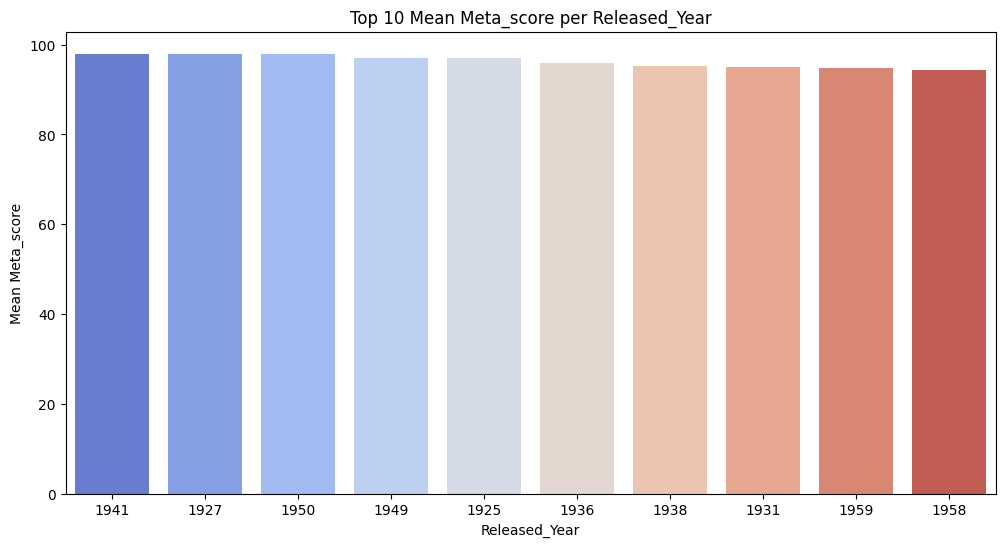

In [16]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Released_Year', y='Meta_score', data=group_data, palette='coolwarm')
plt.title('Top 10 Mean Meta_score per Released_Year')
plt.xlabel('Released_Year')
plt.ylabel('Mean Meta_score')
plt.show()

The bar plot visually represents this information, where each bar corresponds to a year, and the height of each bar represents the mean Meta Score for movies released in that year. The plot is sorted in descending order, so the highest bars are on the left.
In summary, according to this analysis, movies released in 1941, 1927, and 1950 had the highest average Meta Scores among the years considered in the dataset.

12)Find The average rating for each director.

In [17]:
group_data = df.groupby('Director')['IMDB_Rating'].mean().sort_values(ascending=False)
top_10_directors = group_data.head(10)

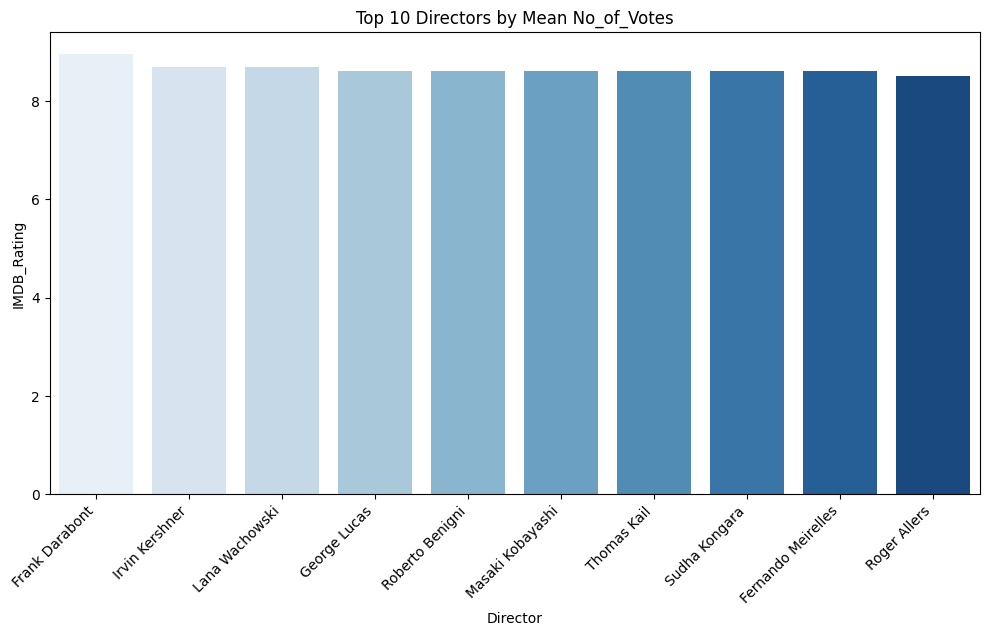

In [18]:
plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_directors.index, y=top_10_directors.values, palette='Blues')
plt.title('Top 10 Directors by Mean No_of_Votes')
plt.xlabel('Director')
plt.ylabel('IMDB_Rating')
plt.xticks(rotation=45, ha='right')  
plt.show()

13) Display top 10 lengthy movies title and runtime.

In [19]:
df['Runtime'] = pd.to_numeric(df['Runtime'], errors='coerce')
top_10_runtime = df.nlargest(10, 'Runtime')[['Series_Title', 'Runtime']]
top_10_runtime

,Series_Title,Runtime
0,The Shawshank Redemption,NaN
1,The Godfather,NaN
2,The Dark Knight,NaN
3,The Godfather: Part II,NaN
4,12 Angry Men,NaN
5,The Lord of the Rings: The Return of the King,NaN
6,Pulp Fiction,NaN
7,Schindler's List,NaN
8,Inception,NaN
9,Fight Club,NaN


<Axes: xlabel='Runtime', ylabel='Series_Title'>

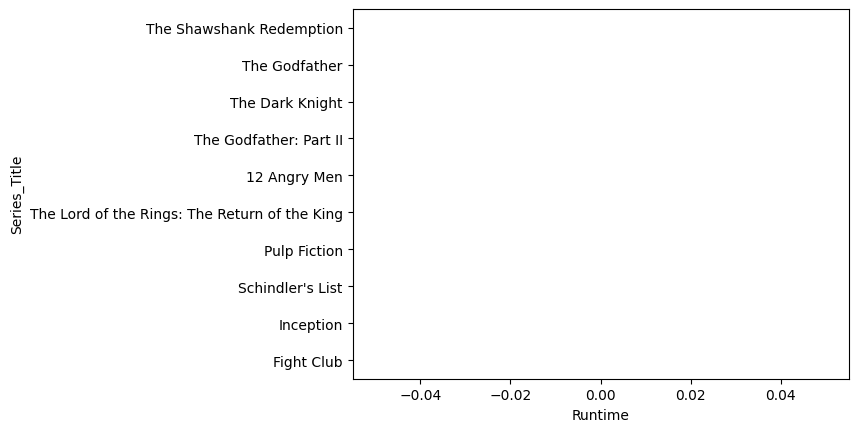

In [20]:
sns.barplot(x='Runtime', y='Series_Title', data=top_10_runtime, palette='viridis')

14) Display Number of movies per year

In [21]:
df['Released_Year'].value_counts

<bound method IndexOpsMixin.value_counts of 0      1994
1      1972
2      2008
3      1974
4      1957
       ... 
995    1961
996    1956
997    1953
998    1944
999    1935
Name: Released_Year, Length: 1000, dtype: object>

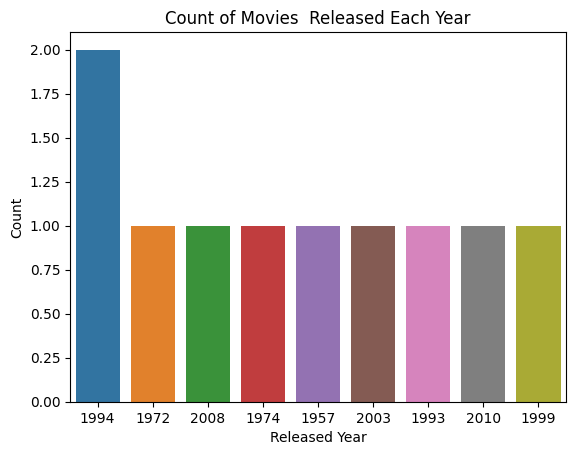

In [22]:
sns.countplot(x='Released_Year',data=df.head(10))
sns.countplot(x='Released_Year', data=df.head(10))
plt.title('Count of Movies  Released Each Year')
plt.xlabel('Released Year')
plt.ylabel('Count')
plt.show()

15) Find most Popular Movies Title (Higest Meta Score)

In [23]:
most_popular_movies = df[df['Meta_score'] == df['Meta_score'].max()]['Series_Title']
print("Most Popular Movies based on Meta Score:")
print(most_popular_movies)

Most Popular Movies based on Meta Score:
1               The Godfather
50                 Casablanca
81                Rear Window
116        Lawrence of Arabia
119                   Vertigo
124              Citizen Kane
260     Trois couleurs: Rouge
274       Fanny och Alexander
423            Il conformista
440    Sweet Smell of Success
491                   Boyhood
559                 Notorious
Name: Series_Title, dtype: object


16) Display top 10 highest rated movies titles and its directors.

In [24]:
top_10_rating = df.nlargest(10, 'IMDB_Rating')[['Series_Title', 'IMDB_Rating','Director']]
top_10_rating

,Series_Title,IMDB_Rating,Director
0,The Shawshank Redemption,9.3,Frank Darabont
1,The Godfather,9.2,Francis Ford Coppola
2,The Dark Knight,9.0,Christopher Nolan
3,The Godfather: Part II,9.0,Francis Ford Coppola
4,12 Angry Men,9.0,Sidney Lumet
5,The Lord of the Rings: The Return of the King,8.9,Peter Jackson
6,Pulp Fiction,8.9,Quentin Tarantino
7,Schindler's List,8.9,Steven Spielberg
8,Inception,8.8,Christopher Nolan
9,Fight Club,8.8,David Fincher


<Axes: xlabel='IMDB_Rating', ylabel='Series_Title'>

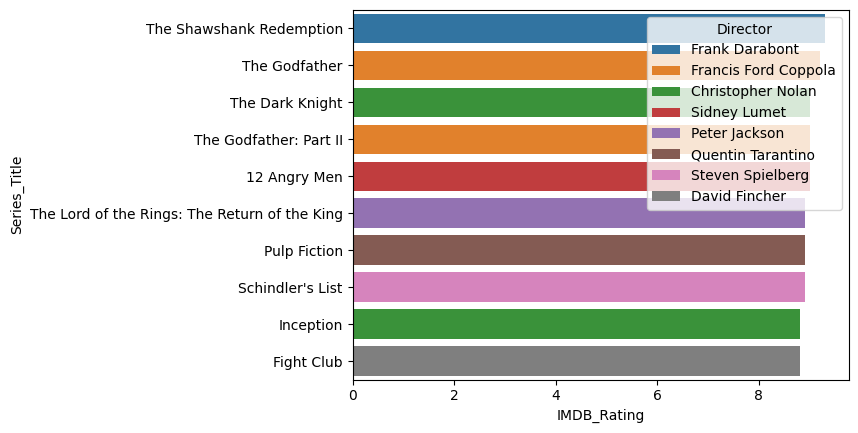

In [25]:
sns.barplot(x='IMDB_Rating', y='Series_Title', data=top_10_rating,hue='Director',dodge=False) 

17) Find Average Rating of Movies Year Wise

In [26]:
Averagerating=df.groupby('Released_Year')['IMDB_Rating'].mean()
Averagerating

Released_Year
1920    8.100000
1921    8.300000
1922    7.900000
1924    8.200000
1925    8.100000
          ...   
2017    7.890909
2018    7.994737
2019    7.995652
2020    8.133333
PG      7.600000
Name: IMDB_Rating, Length: 100, dtype: float64

18)Does Rating Affect the Meta_score.

<Axes: xlabel='IMDB_Rating', ylabel='Meta_score'>

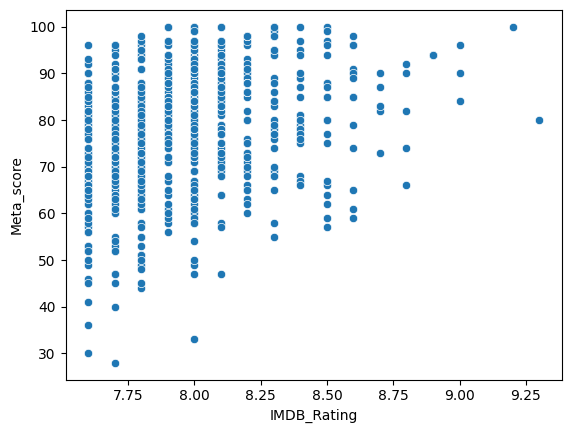

In [27]:
sns.scatterplot(x='IMDB_Rating',y='Meta_score',data=df)

19) CLassify Movies based on Rating (Excellent,Good,and Average).

In [28]:
def Rating(Rating):
    if Rating >=7.0:
        return 'Excellent'
    elif  Rating>=6.0:
        return 'Good'
    else:
        return 'Average'
    
        

In [29]:
df['Rating_Cat']=df['IMDB_Rating'].apply(Rating)
df.head()


,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross,Rating_Cat
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,NaN,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469",Excellent
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,NaN,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411",Excellent
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,NaN,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444",Excellent
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,NaN,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000",Excellent
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,NaN,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000",Excellent


20) Count Number Of Action Movies .

In [30]:
len(df[df['Genre'].str.contains('Action',case=False)])

189

21) Find Unique Values From Genre.

In [31]:

Genre_list=[]
for  i in df['Genre']:
    Genre_list.append(i.split(','))


In [32]:
one_list=[]
for j in  Genre_list:
    for k in j :
        one_list.append(k)

In [33]:
uni_Genre=[]
for j in one_list:
    if j not in uni_Genre:
        uni_Genre.append(j)

In [34]:
uni_Genre

['Drama',
 'Crime',
 ' Drama',
 'Action',
 ' Crime',
 ' Adventure',
 'Biography',
 ' History',
 ' Sci-Fi',
 ' Romance',
 'Western',
 ' Fantasy',
 'Comedy',
 ' Thriller',
 'Adventure',
 'Animation',
 ' Family',
 ' War',
 ' Mystery',
 ' Music',
 ' Comedy',
 'Horror',
 ' Biography',
 ' Action',
 ' Western',
 'Mystery',
 ' Horror',
 ' Musical',
 ' Film-Noir',
 ' Sport',
 'Film-Noir',
 'Fantasy',
 'Family',
 'Thriller']

22) How Many Series Of Genre were Made.

In [35]:
one_list=[]
for j in  Genre_list:
    for k in j :
        one_list.append(k)

In [36]:
from collections import Counter
Counter(one_list)

Counter({' Drama': 435,
         'Drama': 289,
         'Action': 172,
         'Comedy': 155,
         ' Thriller': 136,
         ' Romance': 125,
         ' Adventure': 124,
         'Crime': 107,
         ' Crime': 102,
         'Biography': 88,
         ' Mystery': 87,
         'Animation': 82,
         ' Comedy': 78,
         'Adventure': 72,
         ' Sci-Fi': 67,
         ' Fantasy': 64,
         ' History': 56,
         ' Family': 54,
         ' War': 51,
         ' Music': 35,
         ' Biography': 21,
         ' Horror': 21,
         ' Sport': 19,
         ' Action': 17,
         ' Musical': 17,
         ' Western': 16,
         ' Film-Noir': 16,
         'Mystery': 12,
         'Horror': 11,
         'Western': 4,
         'Film-Noir': 3,
         'Fantasy': 2,
         'Family': 2,
         'Thriller': 1})

 23)What is the average IMDb rating for movies with different certificates (e.g., 'A', 'UA')?


In [37]:
average_ratings_by_certificate = df.groupby('Certificate')['IMDB_Rating'].mean()
average_ratings_by_certificate

Certificate
16          8.100000
A           7.998985
Approved    7.945455
G           8.000000
GP          7.850000
PG          7.927027
PG-13       7.797674
Passed      8.020588
R           7.869863
TV-14       8.300000
TV-MA       8.100000
TV-PG       7.900000
U           7.976923
U/A         7.600000
UA          7.957143
Unrated     8.100000
Name: IMDB_Rating, dtype: float64

24)How is the distribution of IMDb ratings across various certificates?

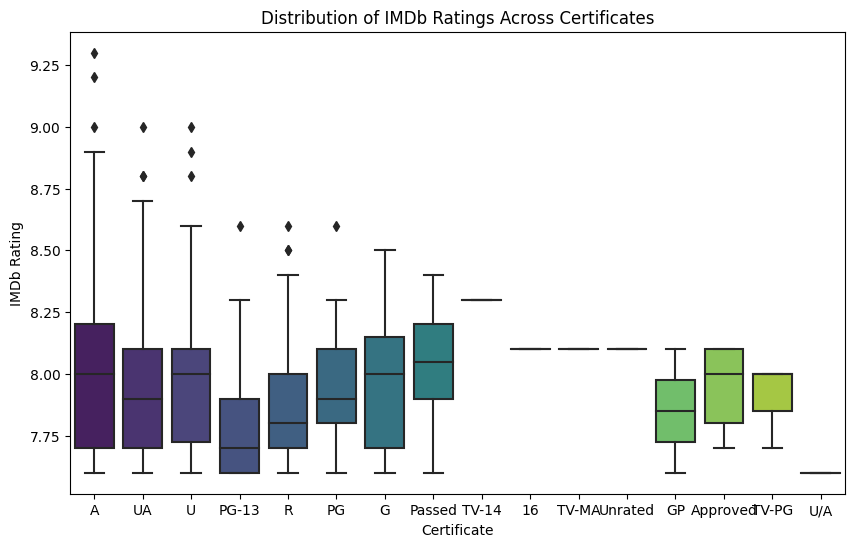

In [38]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Certificate', y='IMDB_Rating', data=df, palette='viridis')
plt.title('Distribution of IMDb Ratings Across Certificates')
plt.xlabel('Certificate')
plt.ylabel('IMDb Rating')
plt.show()

25)Are there any outliers or patterns in highly-rated or poorly-rated movies within specific certificates?



/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 67.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 69.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 75.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 34.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 70.5% of the points cannot be plac

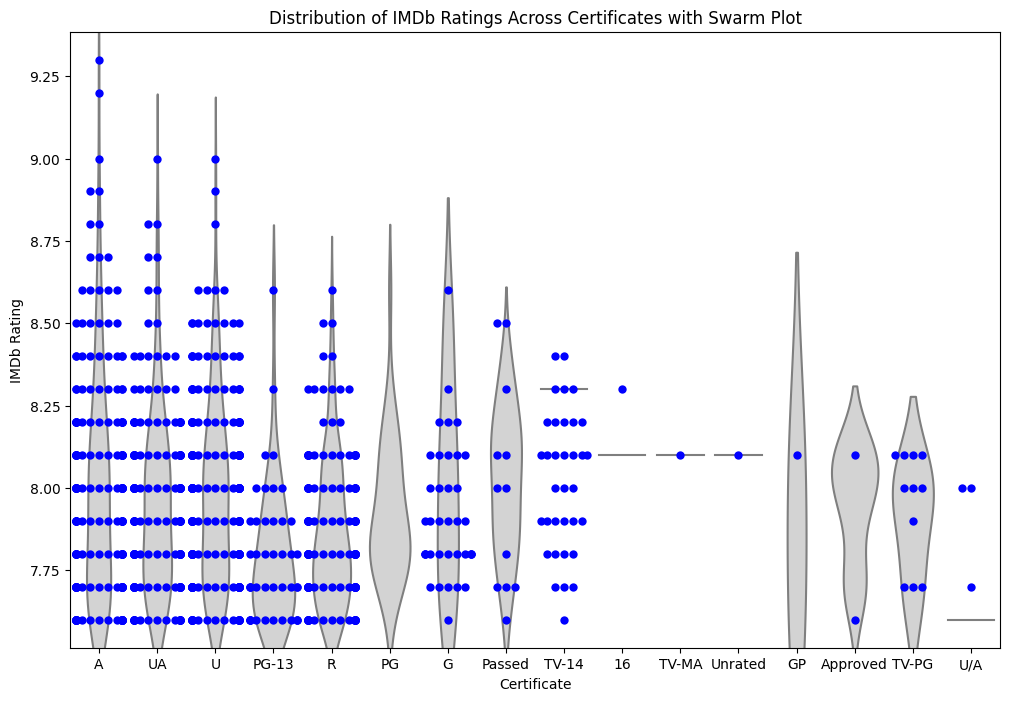

In [39]:
plt.figure(figsize=(12, 8))
sns.violinplot(x='Certificate', y='IMDB_Rating', data=df, inner=None, color='lightgray')
sns.swarmplot(x='Certificate', y='IMDB_Rating', data=df, color='blue', size=6)

plt.title('Distribution of IMDb Ratings Across Certificates with Swarm Plot')
plt.xlabel('Certificate')
plt.ylabel('IMDb Rating')
plt.show()